In [3]:
from PIL import Image
import numpy as np
import requests

In [5]:
image = Image.open("test_img.JPG")

files = {"file":open("test_img.JPG", 'rb')}

response = requests.post("http://172.16.7.21:5001/predict", files=files)

print(response)

<Response [404]>


In [15]:
import io

image = Image.open(io.BytesIO(response.content))

image.save("result.jpg")

In [63]:
import io

image = Image.open("test_img.JPG")

files = [('file', open("IMG_2627.JPG", 'rb')), ('file', open("IMG_2629.JPG", 'rb')), ('file', open("test_img.JPG", 'rb')), ('file', open("test_img.JPG", 'rb'))]

response = requests.post("http://172.16.7.21:5001/predict", files=files)

print(response)

image = Image.open(io.BytesIO(response.content))

image.save("result.jpg")


<Response [200]>


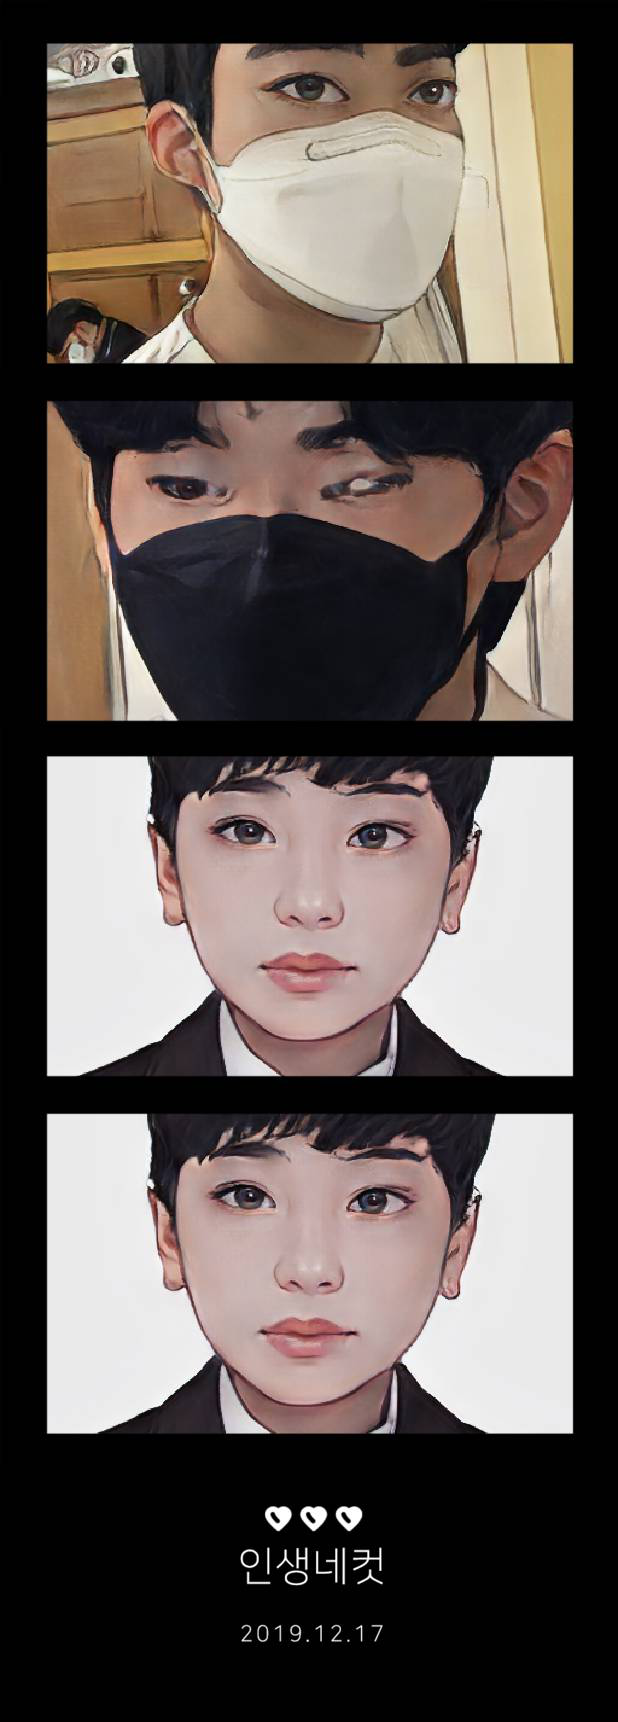

In [64]:
image

In [52]:
from PIL import Image

sample = Image.open("./test_img.JPG")

w, h = sample.size

w, h

(354, 472)

In [56]:

target_width = 618
new_height = int(target_width / w * h)

new_size = (target_width, new_height)

sample = sample.resize(new_size, resample=Image.Resampling.NEAREST)

In [57]:
crop_area = (0, new_height/2-365/2,618, new_height/2+365/2)
crop_area

(0, 229.5, 618, 594.5)

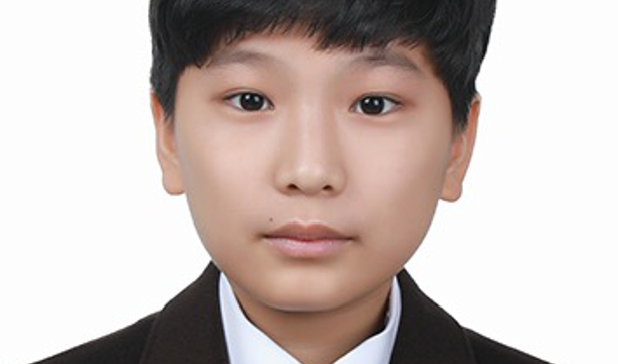

In [58]:
sample.crop(crop_area)

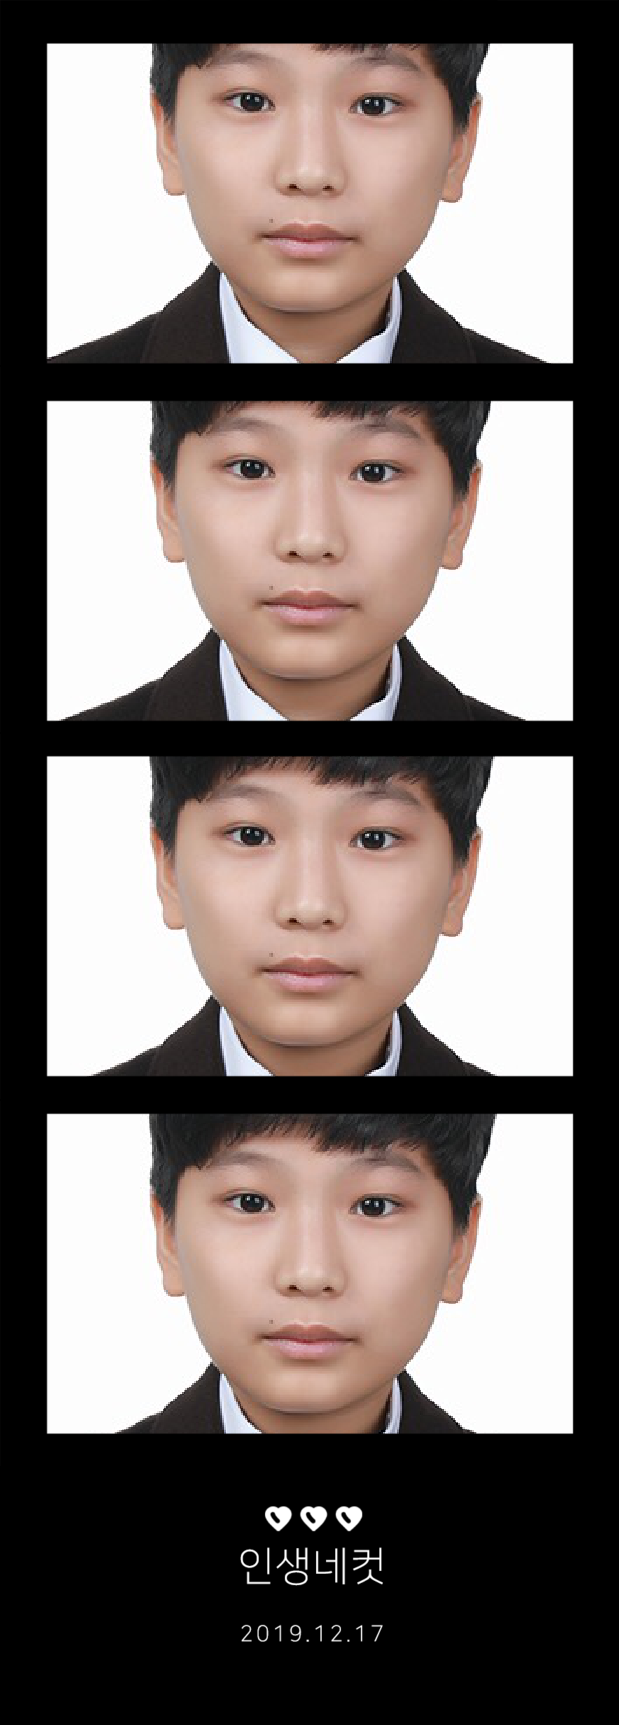

In [15]:
from PIL import Image

def resize_image_fit_frame(image, target_width):
    w, h = image.size

    new_height = int(target_width / w * h)

    new_size = (target_width, new_height)

    image = image.resize(new_size, resample=Image.Resampling.NEAREST)

    crop_area = (0, new_height/2-365/2,618, new_height/2+365/2)

    image = image.crop(crop_area)

    return image


def image_frame(imgs):
    background = Image.open("./restapi/app/frame.png")
    w, original_h = background.size
    # w, h = (618, 365)
    h = original_h / 4.7

    grid = Image.new("RGB", size=(w, original_h))

    for i, img in enumerate(imgs):  
        resized_img = resize_image_fit_frame(img, w)
        grid.paste(resized_img, box=(0, int(i*h)))

    
    grid.paste(background, (0, 0), background)

    return grid


t_img = Image.open("test_img.JPG")
images = [t_img, t_img, t_img, t_img]
f = image_frame(images)

f

In [9]:
from PIL import Image

frame = Image.open("./restapi/app/romela_frame.png")

frame.size

(618, 1716)

In [10]:
from imgurpython import ImgurClient
from datetime import datetime

client_id = "" 
client_secret = ''

client = ImgurClient(client_id, client_secret)
authorization_url = client.get_auth_url('pin')

credentials = client.authorize("398d16e389", "pin")
client.set_user_auth(credentials['access_token'], credentials['refresh_token'])


# config = {
# 		'album': "인생네컷",
# 		'name':  'Test!',
# 		'title': 'Catastrophe!',
# 		'description': 'on {0}'.format(datetime.now())
# }
# client.upload_from_path("./restapi/app/romela_frame.png", config=config, anon=False)

In [11]:
authorization_url

'https://api.imgur.com/oauth2/authorize?client_id=b6a9ced3148a1b3&response_type=pin'

In [15]:
from cloudinary.uploader import upload
from cloudinary.utils import cloudinary_url

upload_result = upload("./restapi/app/romela_frame.png", 
public_id = "myfolder/life_as_four_picture"
)

thumbnail_url1, options = cloudinary_url(upload_result['public_id'], format="jpg", crop="fill", width=100,
                                                     height=100)
thumbnail_url2, options = cloudinary_url(upload_result['public_id'], format="jpg", crop="fill", width=200,
                                                     height=100, radius=20, effect="sepia")

ValueError: Must supply api_key

In [1]:
import requests, json
import pyimgur

CLIENT_ID = "b6a9ced3148a1b3"
path = "./result.jpg"


im = pyimgur.Imgur(CLIENT_ID)
uploaded_image = im.upload_image(path, title="인생네컷")

print(uploaded_image.title)
print(uploaded_image.link)

인생네컷
https://i.imgur.com/NMc2vbo.jpg


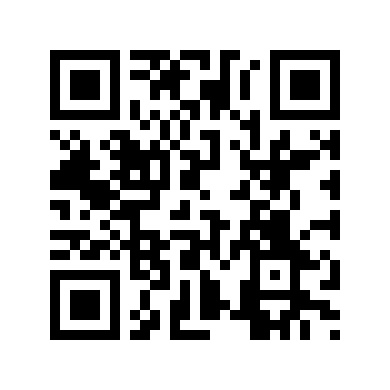

In [3]:
import qrcode


input_data = uploaded_image.link
#Creating an instance of qrcode
qr = qrcode.QRCode(
        version=1,
        box_size=10,
        border=5)
qr.add_data(input_data)
qr.make(fit=True)

img = qr.make_image(fill='black', back_color='white')
img

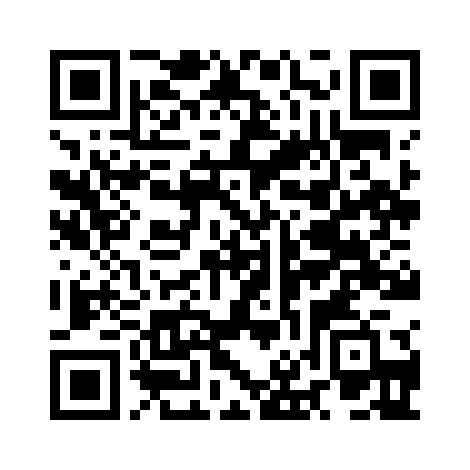

In [6]:

qr.add_data("https://google.com")
qr.make(fit=True)
img = qr.make_image(fill="black", back_color="white")
img

In [8]:
type(img)

qrcode.image.pil.PilImage